In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

import astropy
from astropy import stats
import geopy
from geopy import distance
import math
from itertools import combinations

import scipy
from scipy import signal
from scipy import fft

import cycler
from matplotlib import cm

import glob
import figurefirst as fifi


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
import frequency_functions

# Read in all dfs

In [3]:
dates=['Desert, 10.20.20', 'Whittell, 7.7.21', 'Urban 1, 9.26.21', 'Tahoe, 10.29.21', 'Urban 2, 10.30.21', 'Urban 2, 1.8.22', 'Lemmon, 1.11.22', 'Lemmon, 1.15.22', 'Urban 3, 4.30.22', 'Urban 3, 5.1.22', 'Urban 3, 5.2.22', 'Lemmon, 6.1.22', 'Lemmon, 6.3.22', 'Whittell, 6.7.22', 'Whittell, 6.8.22', 'Tahoe, 6.22.22']

In [4]:
df1=pd.read_hdf('raw_data/small_10.20.20_maskedgpsdata.hdf')
df2=pd.read_hdf('raw_data/small_7.7.21_maskedgpsdata.hdf')
df3=pd.read_hdf('raw_data/small_9.26.21_maskedgpsdata.hdf')
df4=pd.read_hdf('raw_data/small_10.29.21_maskedgpsdata.hdf')
df5=pd.read_hdf('raw_data/small_10.30.21_maskedgpsdata.hdf')
df6=pd.read_hdf('raw_data/small_1.8.22_maskedgpsdata.hdf')
df7=pd.read_hdf('raw_data/small_1.11.22_maskedgpsdata.hdf')
df8=pd.read_hdf('raw_data/small_1.15.22_maskedgpsdata.hdf')
df9=pd.read_hdf('raw_data/small_4.30.22_maskedgpsdata.hdf')
df10=pd.read_hdf('raw_data/small_5.1.22_maskedgpsdata.hdf')
df11=pd.read_hdf('raw_data/small_5.2.22_maskedgpsdata.hdf')
df12=pd.read_hdf('raw_data/small_6.1.22_maskedgpsdata.hdf')
df13=pd.read_hdf('raw_data/small_6.3.22_maskedgpsdata.hdf')
df14=pd.read_hdf('raw_data/small_6.7.22_maskedgpsdata.hdf')
df15=pd.read_hdf('raw_data/small_6.8.22_maskedgpsdata.hdf')
df16=pd.read_hdf('raw_data/small_6.22.22_maskedgpsdata.hdf')

# Separating dfs into just speed and direction

In [5]:
#only horizontal direction for all sensors in each environment
ddf1=df1[['D_1', 'D_2', 'D_4', 'D_5', 'D_6', 'D_7', 'D_8', 'D_9']]
ddf2=df2[['D_1', 'D_2', 'D_3', 'D_5', 'D_6', 'D_8', 'D_9']]
ddf3=df3[['D_1', 'D_2', 'D_4', 'D_5', 'D_6', 'D_7']]
ddf4=df4[['D_1', 'D_2', 'D_3', 'D_5', 'D_6', 'D_7']]
ddf5=df5[['D_1', 'D_2', 'D_3','D_5', 'D_6', 'D_7' ]]
ddf6=df6[['D_1', 'D_2', 'D_3','D_5', 'D_6', 'D_7' ]]
ddf7=df7[['D_1', 'D_2', 'D_3', 'D_4','D_5', 'D_6', 'D_7' ]]
ddf8=df8[['D_1', 'D_2', 'D_3', 'D_4','D_5', 'D_6', 'D_7' ]]
ddf9=df9[['D_1', 'D_2', 'D_3','D_5', 'D_6', 'D_8' ]]
ddf10=df10[['D_1', 'D_2', 'D_3','D_5', 'D_6', 'D_8' ]]
ddf11=df11[['D_1','D_2', 'D_6', 'D_8' ]]
ddf12=df12[['D_1', 'D_2', 'D_3','D_5', 'D_6', 'D_7', 'D_8' ]]
ddf13=df13[['D_2', 'D_3','D_5', 'D_6', 'D_7', 'D_8' ]]
ddf14=df14[['D_2', 'D_5', 'D_6', 'D_7', 'D_8' ]]
ddf15=df15[['D_2', 'D_5', 'D_6', 'D_7', 'D_8' ]]
ddf16=df16[['D_2', 'D_3', 'D_5', 'D_6', 'D_7', 'D_8' ]]

In [6]:
#if you just want S2
sdf1=df1[['S2_1', 'S2_2', 'S2_4', 'S2_5', 'S2_6', 'S2_7', 'S2_8', 'S2_9']]
sdf2=df2[['S2_1', 'S2_2', 'S2_3', 'S2_5', 'S2_6', 'S2_9']]
sdf3=df3[['S2_1', 'S2_2', 'S2_4', 'S2_5', 'S2_6', 'S2_7']]
sdf4=df4[['S2_1', 'S2_2', 'S2_3', 'S2_5', 'S2_6', 'S2_7']]
sdf5=df5[['S2_1', 'S2_2', 'S2_3','S2_5', 'S2_6', 'S2_7' ]]
sdf6=df6[['S2_1', 'S2_2', 'S2_3','S2_5', 'S2_6', 'S2_7' ]]
sdf7=df7[['S2_1', 'S2_2', 'S2_3', 'S2_4','S2_5', 'S2_6', 'S2_7' ]]
sdf8=df8[['S2_1', 'S2_2', 'S2_3', 'S2_4','S2_5', 'S2_6', 'S2_7' ]]
sdf9=df9[['S2_1', 'S2_2', 'S2_3','S2_5', 'S2_6', 'S2_8' ]]
sdf10=df10[['S2_1', 'S2_2', 'S2_3','S2_5', 'S2_6', 'S2_8' ]]
sdf11=df11[[ 'S2_1','S2_2', 'S2_6', 'S2_8' ]]
sdf12=df12[['S2_1', 'S2_2', 'S2_3','S2_5', 'S2_6', 'S2_7', 'S2_8' ]]
sdf13=df13[['S2_2', 'S2_3','S2_5', 'S2_6', 'S2_7', 'S2_8' ]]
sdf14=df14[['S2_2', 'S2_5', 'S2_6', 'S2_7', 'S2_8' ]]
sdf15=df15[['S2_2', 'S2_5', 'S2_6', 'S2_7', 'S2_8' ]]
sdf16=df16[['S2_2', 'S2_3', 'S2_5', 'S2_6', 'S2_7', 'S2_8' ]]

# Analysis

In [7]:
freq=np.empty((16, 0)).tolist()
psd=np.empty((16, 0)).tolist()
delta_power=np.empty((16, 0)).tolist()

freq_D=np.empty((16, 0)).tolist()
newfreq_D=np.empty((16, 0)).tolist()
psd_D=np.empty((16, 0)).tolist()

In [8]:
delta_power_d=np.empty((16, 0)).tolist()

In [9]:
dfs_s2=[sdf1,sdf2,sdf3,sdf4,sdf5,sdf6,sdf7,sdf8,sdf9,sdf10,sdf11,sdf12,sdf13,sdf14,sdf15,sdf16]

In [10]:
dfs_d=[ddf1,ddf2,ddf3,ddf4,ddf5,ddf6,ddf7,ddf8,ddf9,ddf10,ddf11,ddf12,ddf13,ddf14,ddf15,ddf16]

In [11]:
N=len(freq_D)

for i in range (0,N):
    freq_D[i], psd_D[i]= frequency_functions.avgdf_psd(frequency_functions.unwrap_angulardf(dfs_d[i]))

In [12]:
for i in range (0,16):
    freq[i], psd[i]= frequency_functions.avgdf_psd(dfs_s2[i])

In [13]:
# Compute the absolute power by approximating the area under the curve

for i in range (0,16):
    delta_power[i] = scipy.integrate.simps(psd[i], dx=.1)
    delta_power_d[i] = scipy.integrate.simps(psd_D[i], dx=.1)
    print("Absolute delta power:", delta_power[i],  " ", dates[i])

Absolute delta power: 21.365563485595096   Desert, 10.20.20
Absolute delta power: 57.05284268135916   Whittell, 7.7.21
Absolute delta power: 37.03769618294491   Urban 1, 9.26.21
Absolute delta power: 6.133678287484496   Tahoe, 10.29.21
Absolute delta power: 8.972324279571907   Urban 2, 10.30.21
Absolute delta power: 6.9723178246651125   Urban 2, 1.8.22
Absolute delta power: 13.895829826930042   Lemmon, 1.11.22
Absolute delta power: 13.924478092011379   Lemmon, 1.15.22
Absolute delta power: 64.5993010266362   Urban 3, 4.30.22
Absolute delta power: 23.26189350943101   Urban 3, 5.1.22
Absolute delta power: 122.59288457304102   Urban 3, 5.2.22
Absolute delta power: 55.56316434835859   Lemmon, 6.1.22
Absolute delta power: 148.06472615744912   Lemmon, 6.3.22
Absolute delta power: 12.294757074224956   Whittell, 6.7.22
Absolute delta power: 14.785848506796711   Whittell, 6.8.22
Absolute delta power: 22.247480436808374   Tahoe, 6.22.22


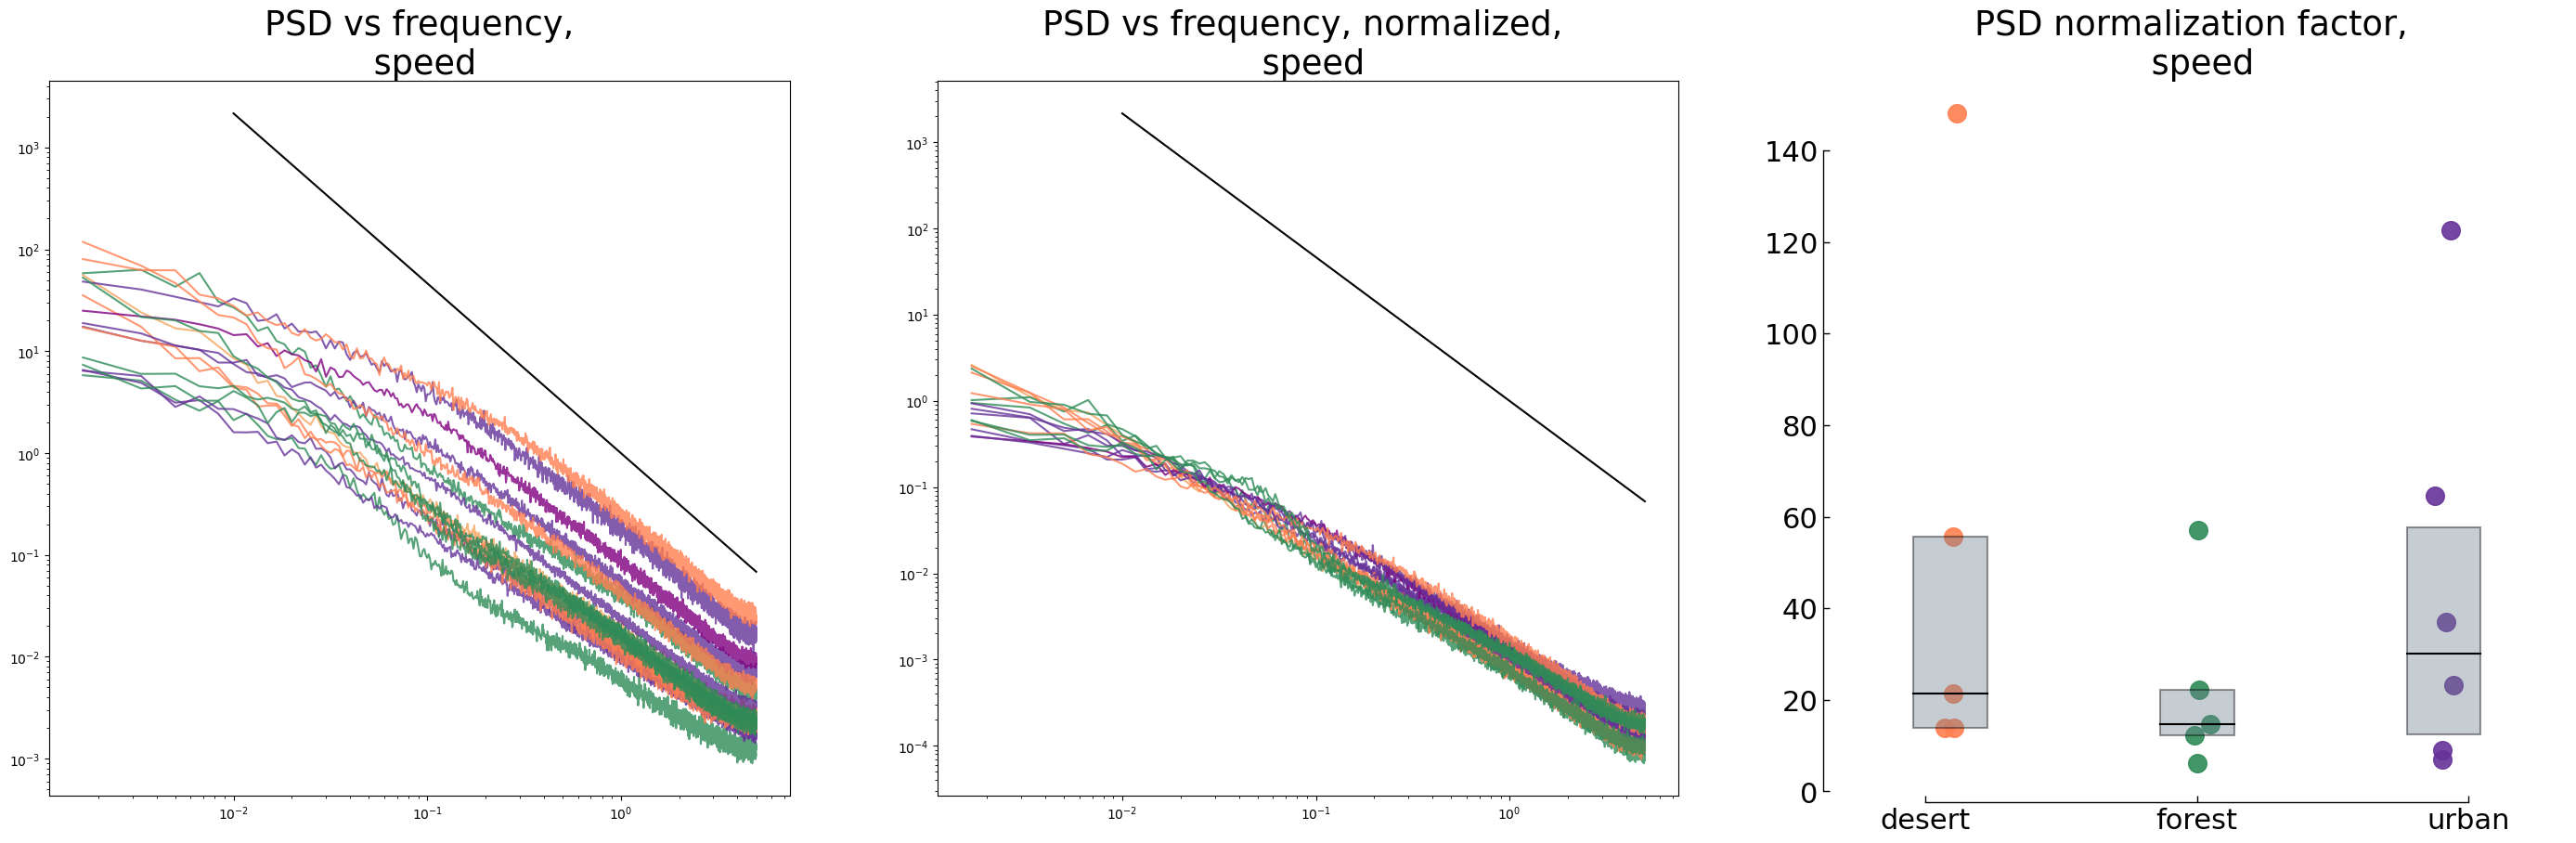

In [14]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(35, 10))
N=len(psd)
j=0

mpl.rcParams.update({'font.size': 22})
color=['sandybrown', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

for i in range(0,N):
    ax[j].loglog(freq[i], psd[i], color=color[i], label=dates[i], alpha=.8)
    ax[j+1].loglog(freq[i], psd[i]/delta_power[i], color=color[i], label=dates[i], alpha=.8)

    
    
ax[0].set_title('PSD vs frequency,\n speed')
ax[1].set_title('PSD vs frequency, normalized, \n speed')
ax[2].set_title('PSD normalization factor, \n speed')

dummydf=pd.DataFrame(columns=('psd', 'environment'))
environment= ['desert', 'forest', 'urban', 'forest', 'urban', 'urban', 'desert', 'desert', 'urban', 'urban', 'urban', 'desert', 'desert', 'forest', 'forest' ,'forest']
dummydf['environment']=environment
dummydf['psd']=delta_power

group = 'time'
column = 'psd'
grouped = dummydf.groupby('environment')
boxprops = dict( linewidth=1.5, color='k')
capprops = dict(linestyle='-', linewidth=1.5, color='Black', alpha=0)
whiskerprops = dict(linestyle='-', linewidth=1.5, color='Black', alpha=0)
medianprops = dict(linestyle='-', linewidth=1.5, color='k')

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
    
im=ax[2].boxplot(vals, widths=.3, patch_artist=True, showfliers=False, labels=['desert', 'forest', 'urban'], boxprops=boxprops, capprops=capprops, whiskerprops=whiskerprops, medianprops=medianprops)
ngroup = len(vals)
clevels = np.linspace(0., 1., ngroup)
c=['coral', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

for x, val, c in zip(xs, vals, c):
    ax[2].scatter(x, val, c=c, alpha=0.9, s=200)
    
fifi.mpl_functions.adjust_spines(ax[2], ['left', 'bottom'],                                 
                                 xticks=[.9, 2, 3.1],
                                 yticks=[0,20,40,60,80,100,120,140],
                                 tick_length=5,
                                 spine_locations={'left': 3, 'bottom': 5},
                                 linewidth=1)

colors=['slategrey', 'slategrey', 'slategrey']
for patch, color in zip(im['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)

        

x = np.linspace(0.01,5,10000)
y=(x**(-5/3))
ax[0].plot(x,y, c='black')
ax[1].plot(x,y, c='black')

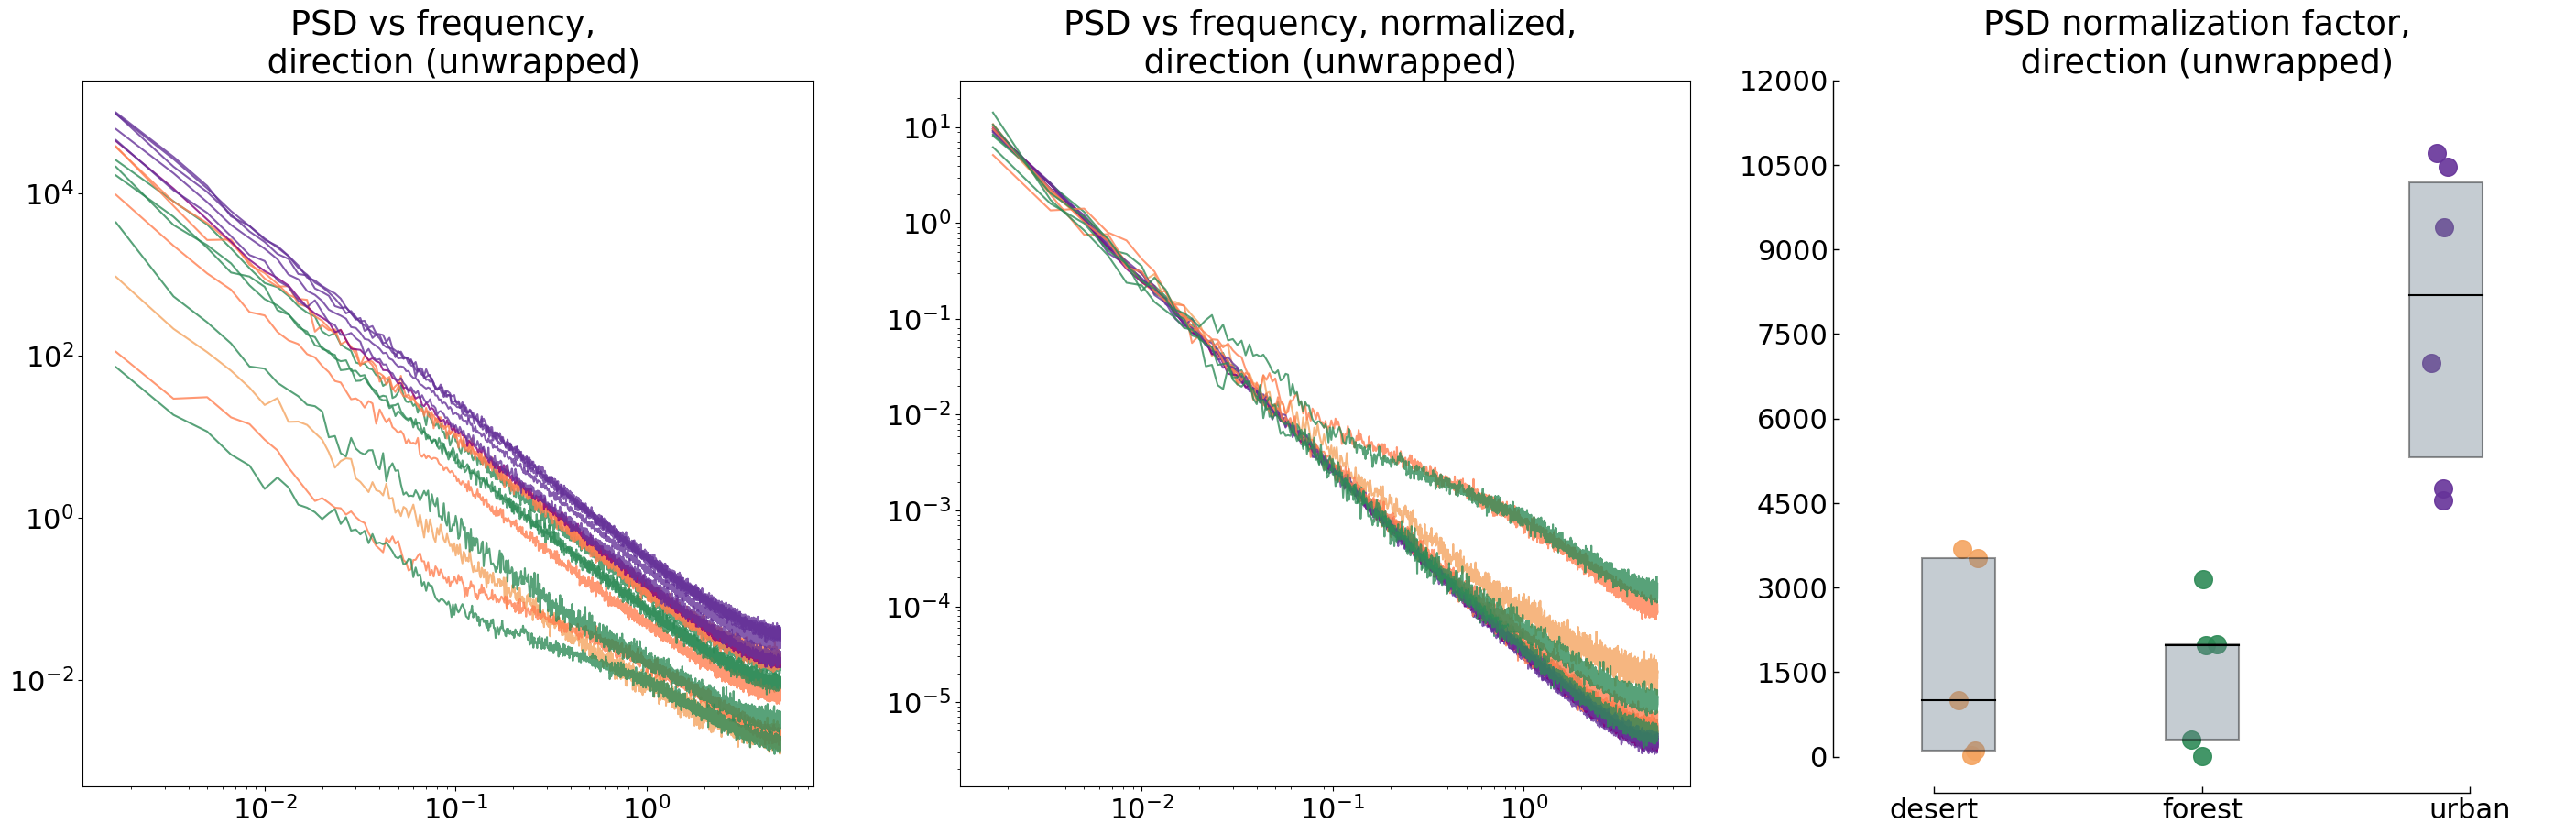

In [15]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(35, 10))
N=len(psd)
j=0
color=['sandybrown', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']
mpl.rcParams.update({'font.size': 22})
for i in range(0,N):

    ax[j].loglog(freq_D[i], psd_D[i], color=color[i], label=dates[i], alpha=.8)
    ax[j+1].loglog(freq_D[i], psd_D[i]/delta_power_d[i], color=color[i], label=dates[i], alpha=.8)

    
ax[0].set_title('PSD vs frequency, \n direction (unwrapped)')

#ax[1].legend(bbox_to_anchor=(2.7,1))
ax[1].set_title('PSD vs frequency, normalized, \n direction (unwrapped)')

#ax[2].set_ylim(0,11000)
ax[2].set_title('PSD normalization factor, \n direction (unwrapped)')

dummydf=pd.DataFrame(columns=('psd', 'environment'))
environment= ['desert', 'forest', 'urban', 'forest', 'urban', 'urban', 'desert', 'desert', 'urban', 'urban', 'urban', 'desert', 'desert', 'forest', 'forest' ,'forest']
dummydf['environment']=environment
dummydf['psd']=delta_power_d

group = 'time'
column = 'psd'
grouped = dummydf.groupby('environment')
boxprops = dict( linewidth=1.5, color='k')
capprops = dict(linestyle='-', linewidth=1.5, color='Black', alpha=0)
whiskerprops = dict(linestyle='-', linewidth=1.5, color='Black', alpha=0)
medianprops = dict(linestyle='-', linewidth=1.5, color='k')

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
    
im=ax[2].boxplot(vals, widths=.3, patch_artist=True, labels=['desert', 'forest', 'urban'], boxprops=boxprops, capprops=capprops, whiskerprops=whiskerprops, medianprops=medianprops)
ngroup = len(vals)
clevels = np.linspace(0., 1., ngroup)

c=['sandybrown', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']
for x, val, c in zip(xs, vals, c):
    ax[2].scatter(x, val, c=c, alpha=0.9, s=200)

yticks=np.arange(0,13000,1500)    
fifi.mpl_functions.adjust_spines(ax[2], ['left', 'bottom'],                                 
                                 xticks=[.9, 2, 3.1],
                                 yticks=yticks,
                                 tick_length=5,
                                 spine_locations={'left': 3, 'bottom': 5},
                                 linewidth=1)

colors=['slategrey', 'slategrey', 'slategrey']
for patch, color in zip(im['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)


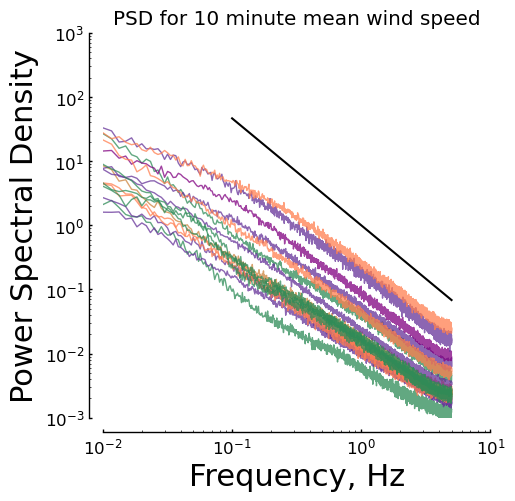

In [16]:
fig, ax =plt.subplots(figsize=(5,5))
N=len(psd)

mpl.rcParams.update({'font.size': 12})
color=['peru', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

for i in range(0,N):
    ax.loglog(freq[i], psd[i], color=color[i], label=dates[i], linewidth=1, alpha=.75)
    
ax.set_title('PSD for 10 minute mean wind speed')
ax.set_ylabel('Power Spectral Density')
ax.set_xlabel('Frequency, Hz')
ax.set_ylim(.01,1000)
ax.set_xlim(.01,10)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],
                                 yticks=[.001, .01, .1, 1, 10, 100, 1000],
                                 xticks=[ .01, .1, 1, 10],
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
# fix the minor ticks and spine
ax.tick_params(which='minor', length=2.5*0.5, color='black', direction='in', width=0.5)
ax.spines.bottom.set_bounds((0.01, 10))
ax.spines.left.set_bounds((.001, 1000))

x = np.linspace(0.1,5,10000)

y=(x**(-5/3))
ax.plot(x,y, c='black')


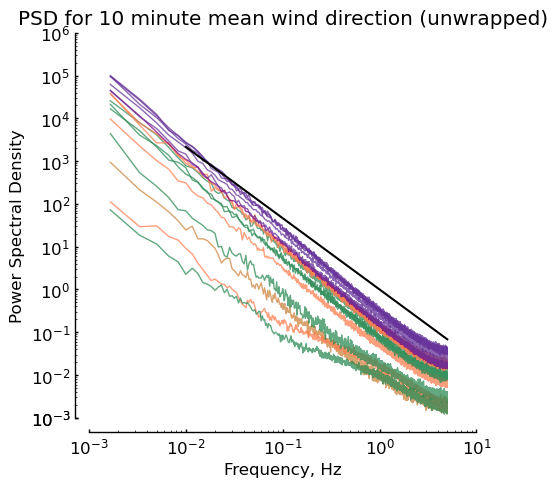

In [17]:
fig, ax =plt.subplots(figsize=(5,5))
N=len(psd)

mpl.rcParams.update({'font.size': 12})
color=['peru', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

for i in range(0,N):
    ax.loglog(freq_D[i], psd_D[i], color=color[i], label=dates[i], linewidth=1, alpha=.75)
    
ax.set_title('PSD for 10 minute mean wind direction (unwrapped)')
ax.set_ylabel('Power Spectral Density')
ax.set_xlabel('Frequency, Hz')
ax.set_ylim(.001,1000000)
ax.set_xlim(.001,10)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],
                                 yticks=[.001, .001, .01, .1, 1, 10, 100, 1000, 10000, 100000, 1000000],
                                 xticks=[.001, .01, .1, 1, 10],
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
# fix the minor ticks and spine
ax.tick_params(which='minor', length=2.5*0.5, color='black', direction='in', width=0.5)
ax.spines.bottom.set_bounds((0.001, 10))
ax.spines.left.set_bounds((.001, 1000000))

x = np.linspace(0.01,5,10000)
y=(x**(-5/3))
ax.plot(x,y, c='black')



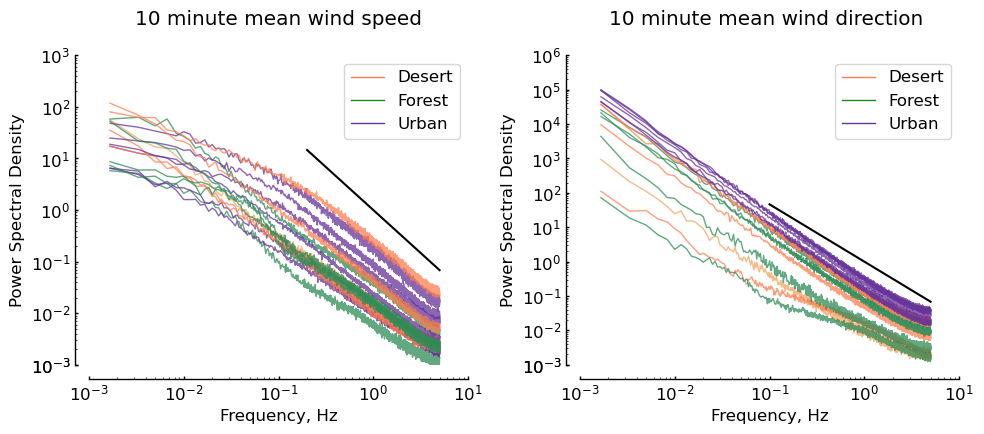

In [18]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(10,4.5), layout='tight')
N=len(psd)

mpl.rcParams.update({'font.size': 12})
color=['sandybrown', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'rebeccapurple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

for i in range(0,N):
    ax[0].loglog(freq[i], psd[i], color=color[i], label=dates[i], linewidth=1, alpha=.75)
    ax[1].loglog(freq_D[i], psd_D[i], color=color[i], label=dates[i], linewidth=1, alpha=.75)
        
ax[0].set_title('10 minute mean wind speed\n')
ax[0].set_ylabel('Power Spectral Density')
ax[0].set_xlabel('Frequency, Hz')
ax[0].set_ylim(.001,1000)
ax[0].set_xlim(.001,10)
fifi.mpl_functions.adjust_spines(ax[0], ['left', 'bottom'],
                                 yticks=[.001, .001, .01, .1, 1, 10, 100, 1000],
                                 xticks=[.001, .01, .1, 1, 10],
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
# fix the minor ticks and spine
ax[0].tick_params(which='minor', length=2.5*0.5, color='black', direction='in', width=0.5)
ax[0].spines.bottom.set_bounds((0.001, 10))
ax[0].spines.left.set_bounds((.001, 1000))


ax[1].set_title('10 minute mean wind direction \n')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_xlabel('Frequency, Hz')
ax[1].set_ylim(.001,1000000)
ax[1].set_xlim(.001,10)
fifi.mpl_functions.adjust_spines(ax[1], ['left', 'bottom'],
                                 yticks=[.001, .001, .01, .1, 1, 10, 100, 1000, 10000, 100000, 1000000],
                                 xticks=[.001, .01, .1, 1, 10],
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
# fix the minor ticks and spine
ax[1].tick_params(which='minor', length=2.5*0.5, color='black', direction='in', width=0.5)
ax[1].spines.bottom.set_bounds((0.001, 10))
ax[1].spines.left.set_bounds((.001, 1000000))

legend_elements = [Line2D([0], [0], color='coral', lw=1, label='Desert'),
                   Line2D([0], [0], color='forestgreen', lw=1, label='Forest'),
                  Line2D([0], [0], color='rebeccapurple', lw=1, label='Urban')]

#make legend
ax[0].legend(handles=legend_elements)
ax[1].legend(handles=legend_elements)

x = np.linspace(0.2,5,10000)
y=(x**(-5/3))
ax[0].plot(x,y, c='black')


x = np.linspace(0.1,5,10000)
y=(x**(-5/3))
ax[1].plot(x,y, c='black')




fig.savefig('psd_direction_speed.svg', format='svg')